# Projet de Python pour la data science 2024 : Analyse prédictive des emplacements pour stations de recharge électrique à Paris
#### Encadrant : M. Victor Quétu 
#### Étudiants : Avner EL BAZ, Manuel Junior NDEFFO NKAMGUE, Daniel TRUSKINOVSKY

![borne-elect](https://www.leparisien.fr/resizer/cYsO4FD5plDcQTP0fs25et6cYoM=/932x582/cloudfront-eu-central-1.images.arcpublishing.com/leparisien/6T2RNV7EWBDJHFXYT26MR5NZGA.jpg)

Dans une perspective éco-responsable d'adaptation des déplacements quotidiens, l'usage de la voiture électrique a le vent en poupe en France. En 2023, 17% des voitures achetées neuves étaient tout électriques et 9% étaient hybrides. En Île-de-France, les ventes de véhicules tout électriques ont augmenté de 60% entre 2022 et 2023, et celles de véhicules hybrides de 41%. 

Ainsi, la ville de Paris s'est dotée d'un réseau de bornes de recharge de véhicules, initialement créées pour les véhicules en libre-service Autolib' de 2011 jusqu'à l'arrêt du service en 2018. En 2021, le service Belib' est créé pour opérer le réseau de bornes et augmenter l'offre dans la capitale.

Nous étudions dans ce projet un jeu de données tiré de plusieurs API publiques de la ville de Paris, obtenu sur la plateforme Challenge Data, gérée par le data lab de l'ENS Paris. Ce jeu de données contient les informations de disponibilité des stations de recharge électrique à Paris du 25/11/2019 au 8/11/2020 et des données sur les bornes sans évolution temporelle. Nous y incorporons également des données de trafic routier pour l'année 2020, que nous avons importé des API de la ville de Paris également.

Avec l'augmentation du nombre de véhicules électriques, de nombreuses nouvelles stations ont été implantées à Paris : il est intéressant de voir si l'on pouvait, a priori, prédire les emplacements où de nouvelles stations devait être implantées et si cela a effectivement été le cas. Les API de Paris OpenData étant toujours actives, on pourra comparer aux données actuelles.

#### Importation des librairies

In [8]:
import numpy as np
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt


#### Description des données

1) Belib' - Prises de recharge pour véhicules électriques - Disponibilité temps réel

Ce jeu de données recense le statut de chaque borne de recharge à Paris : Disponible, En Charge, Passive (branchée mais ne délivrant pas de courant), Hors ligne (ne transmettant pas d'information sur son statut, parmi les 3 précédents), Hors d'usage (en travaux). Les données sont actualisées toutes les 15 minutes sur la période concernée.

2) Belib' - Prises de recharge pour véhicules électriques - Données statiques

Ce jeu de données contient des informations sur les bornes de recharge : localisation géographique, adresse, identifiant sous la forme Sk-Tj pour la borne j de la station k, dispositifs de recharge disponibles.

3) Meteociel - Prévision météo en temps réel

Les données de ce 3ème dataset étant peu interprétables, nous les avons laissé de côté dans cette étude.

Nous avons à la place importé l'historique des données de comptage routier sur l'année 2020 à Paris (API : Comptage routier - Données trafic issues des capteurs permanents). Ce jeu de données contient la mesure du débit de véhicules et du niveau de congestion sur plusieurs "arcs" de comptage routier, évalués toutes les heures du 1er janvier au 31 décembre 2020. Un "arc" désigne un tronçon de rue ou d'avenue où les variables de trafic sont mesurées entre un "noeud amont" et un "noeud aval"




#### Importation des données

In [9]:
df_real_time=pd.read_csv("ytrain_NpxebDC.csv")
df_static=pd.read_csv("info_static.csv")

/tmp/ipykernel_7374/656849402.py:1: DtypeWarning: Columns (1,3,5,11,20,49,52,54,55,56,64,70,71,94,95,101,102,114,129,131,132,133,138,139,152,157,163,174,180,184,193,196,201,207,208,219,220,228,241,245,250,256,258,264,265,269,270,271,272,273) have mixed types. Specify dtype option on import or set low_memory=False.
  df_real_time=pd.read_csv("ytrain_NpxebDC.csv")


In [10]:
df_real_time.head(20)

,timestamp,S7-T1,S2-T1,S19-T1,S56-T3,S85-T3,S16-T3,S16-T1,S94-T3,S28-T1,...,S47-T2,S65-T2,S32-T2,S21-T2,S13-T2,S97-T2,S25-T1,S25-T2,S98-T2,S99-T2
0,2019-11-25T00:00:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
1,2019-11-25T00:15:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
2,2019-11-25T00:30:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
3,2019-11-25T00:45:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
4,2019-11-25T01:00:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
5,2019-11-25T01:15:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
6,2019-11-25T01:30:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
7,2019-11-25T01:45:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
8,2019-11-25T02:00:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
9,2019-11-25T02:15:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN


In [11]:
df_static.head(20)

,t_id,s_id,latitude,longitude,street,city,zipcode,model
0,S84-T1,S84,48.863766,2.411770,104 RUE LOUIS LUMIERE,Paris,75020,"E/F, Combo, T2, CHAdeMO, T3"
1,S84-T3,S84,48.863766,2.411770,104 RUE LOUIS LUMIERE,Paris,75020,"CHAdeMO, T2, T3, E/F, Combo"
2,S86-T1,S86,48.890610,2.354230,27 RUE ORDENER,Paris,75018,"CHAdeMO, Combo, T2, T3, E/F"
3,S86-T2,S86,48.890610,2.354230,27 RUE ORDENER,Paris,75018,E/F
4,S86-T3,S86,48.890610,2.354230,27 RUE ORDENER,Paris,75018,"T3, Combo, CHAdeMO, E/F, T2"
5,S68-T1,S68,48.875465,2.360103,150 RUE DU FAUBOURG SAINT MARTIN,Paris,75010,"Combo, CHAdeMO, T3, T2, E/F"
6,S68-T3,S68,48.875465,2.360103,150 RUE DU FAUBOURG SAINT MARTIN,Paris,75010,"Combo, E/F, T3, CHAdeMO, T2"
7,S28-T1,S28,48.864719,2.359043,5 RUE DE REAUMUR,Paris,75003,"CHAdeMO, T2, Combo, E/F, T3"
8,S28-T3,S28,48.864719,2.359043,5 RUE DE REAUMUR,Paris,75003,"E/F, T3, CHAdeMO, Combo, T2"
9,S17-T3,S17,48.845265,2.411238,4 Rue Changarnier,Paris,75012,"CHAdeMO, T3, Combo, E/F, T2"


#### Traitement des données

1) Période d'étude

L'année 2020 introduit un biais évident pour l'étude de la disponibilité des stations : la pandémie de COVID-19.

Les cartes thermiques réalisées ci-dessous montrent une baisse significative de l'usage des bornes pendant le premier confinement du 16 mars au 11 mai 2020. Nous avons donc décidé de centrer notre étude sur la période du **1er janvier au 15 mars 2020** (on ignore les valeurs de fin 2019 car les données de trafic commencent en 2020).

/tmp/ipykernel_7374/866894008.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  status_data = df_real_time.replace({'Down': 1, 'Offline': 0, 'Available': -1, 'Charging': 2, 'Passive': 3})


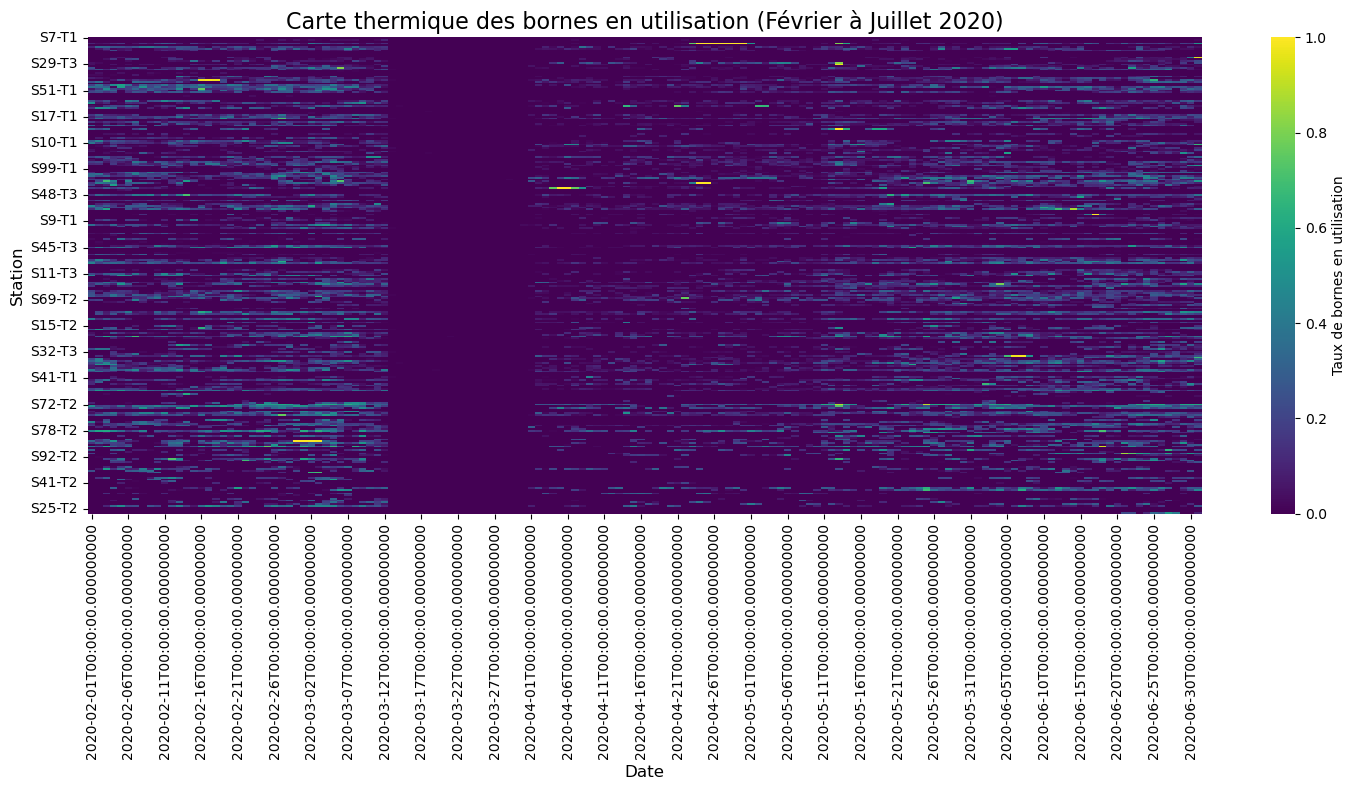

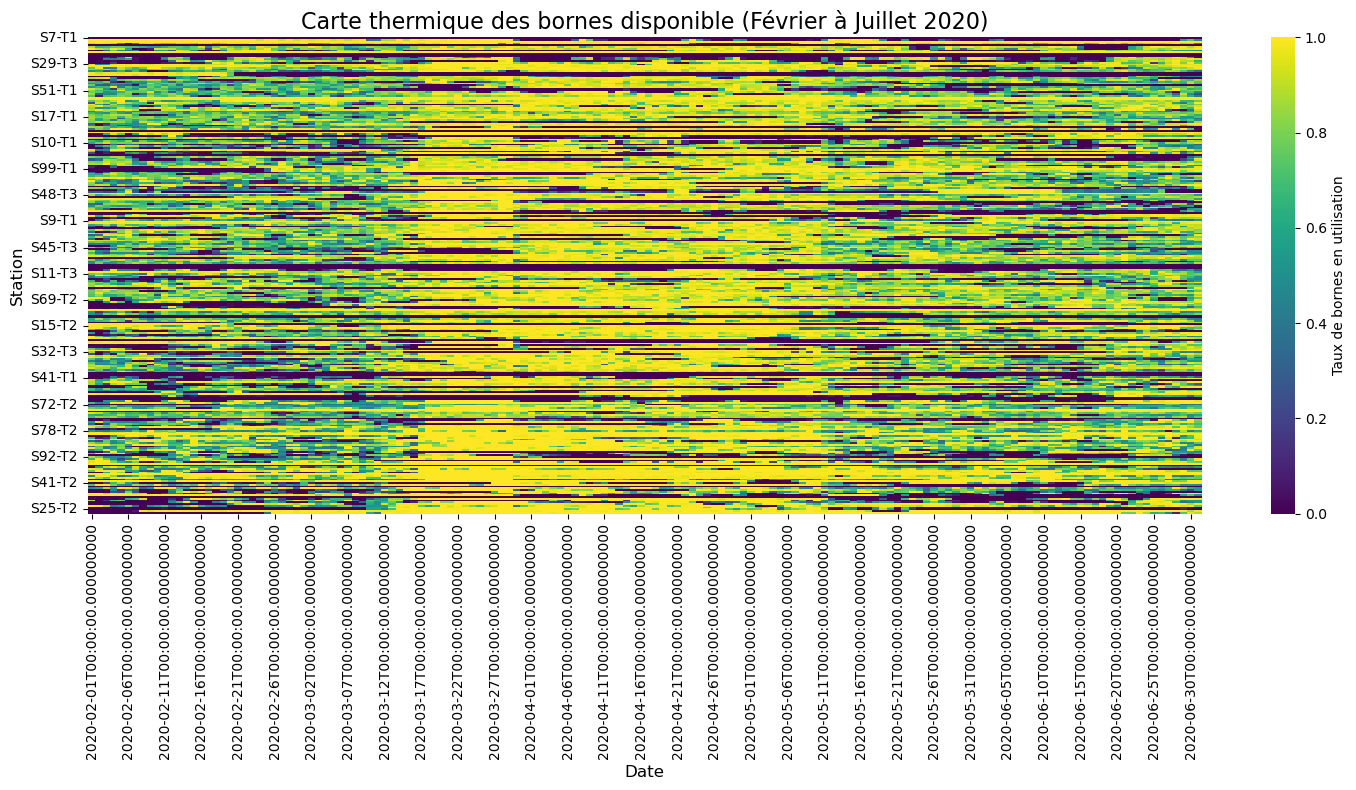

In [12]:
##Changements d'utilisation pendant la période de COVID-19

df_real_time['timestamp'] = pd.to_datetime(df_real_time['timestamp'], errors='coerce')
df_real_time.set_index('timestamp', inplace=True)

# Remplacement des statuts par des valeurs numériques (on laisse les NaN tel quel)
status_data = df_real_time.replace({'Down': 1, 'Offline': 0, 'Available': -1, 'Charging': 2, 'Passive': 3})

# Agrégation par jour
daily_charging = status_data.resample('D').apply(lambda x: (x == 2).mean())
daily_available= status_data.resample('D').apply(lambda x: (x == -1).mean())


# Filtrer les données pour la période étudiée
period_charging = daily_charging.loc["2020-02-01":"2020-07-01"]
period_available = daily_available.loc["2020-02-01":"2020-07-01"]

# Heatmap des bornes en utilisation de Février à Juillet 2020
plt.figure(figsize=(15, 8))
sns.heatmap(period_charging.T, cmap="viridis", cbar_kws={'label': 'Taux de bornes en utilisation'},
            xticklabels=5, yticklabels=15)
plt.title('Carte thermique des bornes en utilisation (Février à Juillet 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()

# Création du heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(period_available.T, cmap="viridis", cbar_kws={'label': 'Taux de bornes en utilisation'},
            xticklabels=5, yticklabels=15)
plt.title('Carte thermique des bornes disponible (Février à Juillet 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Station', fontsize=12)
plt.tight_layout()
plt.show()

df_real_time.reset_index(inplace=True) #pour réaliser les heatmap, le timestamp avait été mis comme indice du dataframe, on remet l'indice par défaut


2. Étude statique des bornes

Notre jeu de données comporte 91 stations présentes à Paris en 2020, avec 3 bornes de recharge par station soit 273 bornes. Le nombre de stations par arrondissement varie bien sûr selon la taille de l'arrondissement : 9 stations dans le 16ème (codes postaux 75016 et 75116), 7 dans le 15ème qui sont des arrondissements très étendus contre seulement 2 dans le 1er par exemple.

Ramené en nombre d'habitants par station, les arrondissements du centre de Paris sont mieux lotis avec une station pour 7042 habitants dans le 7ème mais seulement une pour 38608 habitants dans le 20ème par exemple.



In [13]:
print(df_static["s_id"].nunique(),
df_static["t_id"].nunique())

df_static['zipcode'] = df_static['zipcode'].replace(75116, 75016) #ces 2 codes postaux représentent le 16ème arrondissement

count = df_static['zipcode'].value_counts().reset_index()
count.columns = ['arrondissement', 'nombre']  # Renommer les colonnes
count['nombre'] = count['nombre'] // 3


populations=np.array([[75001, 16149], 
[75002, 21277] ,
[75003,33651 ],
[75004, 29326 ],
[75005, 58050 ],
[75006, 40452 ],
[75007, 49300 ],
[75008, 36218 ],
[75009, 60784 ],
[75010 ,83873 ],
[75011, 145124 ],
[75012, 141275 ],
[75013, 179013 ],
[75014, 134926 ],
[75015, 231186 ],
[75016, 165118 ],
[75017, 167765 ],
[75018, 191911 ],
[75019, 184156 ],
[75020, 193044 ]])

df_populations = pd.DataFrame(populations, columns=['arrondissement', 'population'])
df_populations_2=pd.merge(count, df_populations, on='arrondissement')
df_populations_2['ratio']=df_populations_2['population']/df_populations_2['nombre']
df_populations_2.sort_values(by='ratio', ascending=True)

91 273


,arrondissement,nombre,population,ratio
4,75007,7,49300,7042.857143
18,75001,2,16149,8074.500000
10,75008,4,36218,9054.500000
15,75004,3,29326,9775.333333
17,75002,2,21277,10638.500000
14,75006,3,40452,13484.000000
16,75003,2,33651,16825.500000
0,75016,9,165118,18346.444444
13,75005,3,58050,19350.000000
2,75012,7,141275,20182.142857


In [57]:
#Carte des stations à Paris

coord_stations = df_static[['latitude', 'longitude']].drop_duplicates().to_numpy()

m=folium.Map(location=(48.863766 ,  2.41177  ))
for i in range(len(coord_stations)):
    folium.Marker(location=coord_stations[i]).add_to(m)
m

On effectue la jointure des données statiques avec les données temps réel, sur l'identifiant de bornes `t_id`en commun.

In [15]:
##Joindre les données temps réel avec les informations géographiqes

df_usage_melted = df_real_time.melt(id_vars=['timestamp'], var_name='t_id', value_name='status') #dataframe converti en version "longue" : 1 observation = 1 case

df_usage_with_station = pd.merge(df_usage_melted, df_static, on='t_id') #jointure avec t_id

status_counts = df_usage_with_station.groupby(['timestamp', 's_id', 'status']).size().unstack(fill_value=0) #grouper par date et station
status_counts = status_counts.reset_index()

df_static_s_id = df_static.drop_duplicates(subset=['s_id']) #seulement la première occurence
merged_df = pd.merge(status_counts, df_static_s_id [['s_id', 'latitude', 'longitude', 'zipcode']], on='s_id', how='left') #dataframe fusionné



Pour pouvoir tester la corrélation entre les données de trafic et les données des stations, il faut ajuster le pas temporel à 1h (on a initialement des mesures toutes les 15 minutes pour les stations).

In [21]:
##Convertir les données toutes les 15 min en données par heure (comme les données de trafic)
merged_df_grouped = merged_df.sort_values(by=['s_id', 'timestamp'])
merged_df_grouped.set_index('timestamp', inplace=True)
hourly_df = merged_df_grouped.groupby([pd.Grouper(freq='H'), 's_id']).mean() #on redécoupe par heure
hourly_df['taux_occup']=(hourly_df['Charging']+hourly_df['Passive']+(2/3)*hourly_df['Offline'])/3 #taux d'occupation moyenne avec 2 chances sur 3 que "Offline" signifie "Occupé"
hourly_df['taux_hs']=(hourly_df['Offline']+hourly_df['Down'])/3 #taux de bornes hors service : "Down" ou "Offline"

#délimiter période d'étude
debut= "2020-01-01"
fin = "2020-03-15"


hourly_df.reset_index(inplace=True)
hourly_df['timestamp']=hourly_df['timestamp']+ pd.Timedelta(hours=1)
hourly_df= hourly_df[(hourly_df['timestamp'] >= debut) & (hourly_df['timestamp'] <= fin)]

hourly_df.dropna()

/tmp/ipykernel_7374/2791091859.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df = merged_df_grouped.groupby([pd.Grouper(freq='H'), 's_id']).mean() #on redécoupe par heure


,timestamp,s_id,Available,Charging,Down,Offline,Passive,latitude,longitude,zipcode,taux_occup,taux_hs
80444,2020-01-01 00:00:00+00:00,S1,2.666667,0.333333,0.0,0.00,0.0,48.855667,2.354089,75004.0,0.111111,0.00
80445,2020-01-01 00:00:00+00:00,S10,0.333333,2.666667,0.0,0.00,0.0,48.864240,2.397724,75020.0,0.888889,0.00
80446,2020-01-01 00:00:00+00:00,S11,2.000000,0.000000,0.0,0.00,1.0,48.861016,2.283080,75016.0,0.333333,0.00
80447,2020-01-01 00:00:00+00:00,S12,0.000000,0.000000,0.0,3.00,0.0,48.824388,2.336857,75014.0,0.666667,1.00
80448,2020-01-01 00:00:00+00:00,S13,0.000000,0.000000,0.0,3.00,0.0,48.882640,2.335728,75009.0,0.666667,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
242055,2020-03-15 00:00:00+00:00,S95,0.000000,0.000000,0.0,3.00,0.0,48.868511,2.295469,75016.0,0.666667,1.00
242056,2020-03-15 00:00:00+00:00,S96,3.000000,0.000000,0.0,0.00,0.0,48.835499,2.349650,75013.0,0.000000,0.00
242057,2020-03-15 00:00:00+00:00,S97,3.000000,0.000000,0.0,0.00,0.0,48.839947,2.397822,75012.0,0.000000,0.00
242058,2020-03-15 00:00:00+00:00,S98,2.250000,0.000000,0.0,0.75,0.0,48.849980,2.361920,75004.0,0.166667,0.25


In [58]:
#Supprimer stations avec plus que 50% de "offline" ou "down"

taux_hs_moyen= hourly_df.groupby('s_id')['taux_hs'].mean()
bonnes_stations=taux_hs_moyen[taux_hs_moyen <= 0.5].index

hourly_df = hourly_df[hourly_df['s_id'].isin(bonnes_stations)]


debut_semaine = "2020-01-22"
fin_semaine = "2020-01-29"

hourly_df_semaine = hourly_df[(hourly_df['timestamp'] >= debut_semaine) & (hourly_df['timestamp'] <= fin_semaine)]
hourly_df_semaine



,timestamp,s_id,Available,Charging,Down,Offline,Passive,latitude,longitude,zipcode,taux_occup,taux_hs
126308,2020-01-22 00:00:00+00:00,S1,1.00,0.25,0.0,0.00,1.75,48.855667,2.354089,75004.0,0.666667,0.00
126309,2020-01-22 00:00:00+00:00,S10,1.00,1.00,0.0,0.00,1.00,48.864240,2.397724,75020.0,0.666667,0.00
126310,2020-01-22 00:00:00+00:00,S11,1.00,0.00,0.0,0.00,2.00,48.861016,2.283080,75016.0,0.666667,0.00
126311,2020-01-22 00:00:00+00:00,S12,0.75,0.75,0.0,0.75,0.75,48.824388,2.336857,75014.0,0.666667,0.25
126314,2020-01-22 00:00:00+00:00,S15,0.75,2.00,0.0,0.00,0.25,48.846295,2.374877,75012.0,0.750000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
141679,2020-01-29 00:00:00+00:00,S92,1.00,0.00,0.0,0.00,2.00,48.841663,2.286931,75015.0,0.666667,0.00
141680,2020-01-29 00:00:00+00:00,S93,1.50,1.50,0.0,0.00,0.00,48.859184,2.273944,75016.0,0.500000,0.00
141683,2020-01-29 00:00:00+00:00,S96,1.50,0.50,0.0,0.00,1.00,48.835499,2.349650,75013.0,0.500000,0.00
141684,2020-01-29 00:00:00+00:00,S97,3.00,0.00,0.0,0.00,0.00,48.839947,2.397822,75012.0,0.000000,0.00


In [63]:
df_static_keep=df_static[df_static['s_id'].isin(bonnes_stations)]

coord_bonnes_stations = df_static_keep[['latitude', 'longitude']].drop_duplicates().to_numpy()

coord_mauvaises_stations = np.array([coord for coord in coord_stations if coord.tolist() not in coord_bonnes_stations.tolist()])


m2=folium.Map(location=(48.863766 ,  2.41177  ))
for i in range(len(coord_bonnes_stations)):
    folium.Marker(location=coord_bonnes_stations[i],icon=folium.Icon(color="blue")).add_to(m2)
for j in range(len(coord_mauvaises_stations)):
    folium.Marker(location=coord_mauvaises_stations[j],icon=folium.Icon(color="red")).add_to(m2)

m2

Chargement en csv

In [23]:
hourly_df_semaine.to_csv("hourly_df_semaine2229.csv", index=False)


Il faudra grouper les stations par carré

In [24]:
#Importation des données de trafic pour la semaine 22 janvier - 29 janvier 
df_trafic = pd.read_csv('moyennes_par_carre_et_t1h2229.csv')
df_station_agg = pd.read_csv('station_agg.csv')

df_trafic.rename(columns={'t_1h': 'timestamp'}, inplace=True)
df_station_agg['timestamp'] = pd.to_datetime(df_station_agg['timestamp'])
df_trafic['timestamp'] = pd.to_datetime(df_trafic['timestamp'])

# Localize the timestamps to UTC if they are naive
if df_station_agg['timestamp'].dt.tz is None:
    df_station_agg['timestamp'] = df_station_agg['timestamp'].dt.tz_localize('UTC')

if df_trafic['timestamp'].dt.tz is None:
    df_trafic['timestamp'] = df_trafic['timestamp'].dt.tz_localize('UTC')

df_joint = pd.merge(df_trafic, df_station_agg, on=['timestamp', 'carre_id'], how='inner')
df_joint


,timestamp,carre_id,moyenne_k,somme_k,count_k,lati_x,long_x,moyenne_occup,count_occup,lati_y,long_y
0,2020-01-22 01:00:00+00:00,10_17,0.000000,0.00000,3,48.8625,2.3425,0.000000,1,48.8625,2.3425
1,2020-01-22 01:00:00+00:00,10_20,0.000000,0.00000,2,48.8625,2.3575,0.000000,1,48.8625,2.3575
2,2020-01-22 01:00:00+00:00,10_28,2.774540,16.64724,6,48.8625,2.3975,0.666667,1,48.8625,2.3975
3,2020-01-22 01:00:00+00:00,10_3,0.248520,1.49112,6,48.8625,2.2725,0.333333,1,48.8625,2.2725
4,2020-01-22 01:00:00+00:00,10_5,0.000000,0.00000,2,48.8625,2.2825,0.666667,1,48.8625,2.2825
...,...,...,...,...,...,...,...,...,...,...,...
10075,2020-01-29 00:00:00+00:00,9_14,3.546114,39.00725,11,48.8575,2.3275,1.000000,1,48.8575,2.3275
10076,2020-01-29 00:00:00+00:00,9_19,6.510043,84.63056,13,48.8575,2.3525,0.333333,1,48.8575,2.3525
10077,2020-01-29 00:00:00+00:00,9_24,2.263989,24.90388,11,48.8575,2.3775,0.500000,1,48.8575,2.3775
10078,2020-01-29 00:00:00+00:00,9_29,1.070695,4.28278,4,48.8575,2.4025,0.583333,1,48.8575,2.4025


In [76]:
from scipy.stats import pearsonr



df_1_voisin = pd.read_csv('station_agg.csv')



# Assuming df_joint is already defined and contains the necessary columns
# Function to compute Pearson correlation for each group
def compute_pearson(group):
    if len(group) > 1:  # Need at least two data points to compute correlation
        correlation, _ = pearsonr(group['moyenne_occup'], group['moyenne_k'])
        return correlation
    else:
        return None  # Not enough data to compute correlation

# Group by 'carre_id' and compute the Pearson correlation
correlation_results = df_joint.groupby('carre_id').apply(compute_pearson)

# Convert the results to a DataFrame
correlation_df = correlation_results.reset_index(name='pearson_correlation')

# Display the result
#print(correlation_df)



/tmp/ipykernel_7374/1630337092.py:13: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, _ = pearsonr(group['moyenne_occup'], group['moyenne_k'])
/tmp/ipykernel_7374/1630337092.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_results = df_joint.groupby('carre_id').apply(compute_pearson)


                      timestamp s_id  Available  Charging  Down  Offline  \
80479 2020-01-01 00:00:00+00:00  S42        0.0       0.0   0.0      3.0   
80570 2020-01-01 01:00:00+00:00  S42        0.0       0.0   0.0      3.0   
80661 2020-01-01 02:00:00+00:00  S42        0.0       0.0   0.0      3.0   
80752 2020-01-01 03:00:00+00:00  S42        0.0       0.0   0.0      3.0   
80843 2020-01-01 04:00:00+00:00  S42        0.0       0.0   0.0      3.0   
80934 2020-01-01 05:00:00+00:00  S42        0.0       0.0   0.0      3.0   
81025 2020-01-01 06:00:00+00:00  S42        0.0       0.0   0.0      3.0   
81116 2020-01-01 07:00:00+00:00  S42        0.0       0.0   0.0      3.0   
81207 2020-01-01 08:00:00+00:00  S42        0.0       0.0   0.0      3.0   
81298 2020-01-01 09:00:00+00:00  S42        0.0       0.0   0.0      3.0   
81389 2020-01-01 10:00:00+00:00  S42        0.0       0.0   0.0      3.0   
81480 2020-01-01 11:00:00+00:00  S42        0.0       0.0   0.0      3.0   
81571 2020-0

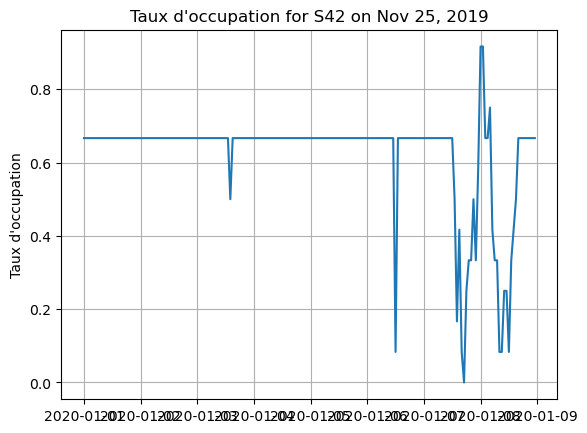

In [16]:
df_station_41 = hourly_df[(hourly_df['s_id'] == 'S42') & (hourly_df['timestamp'].dt.date.isin([pd.to_datetime('2020-01-01').date(),
pd.to_datetime('2020-01-02').date(),
pd.to_datetime('2020-01-03').date(),
pd.to_datetime('2020-01-04').date(),
pd.to_datetime('2020-01-05').date(),
pd.to_datetime('2020-01-06').date(),
pd.to_datetime('2020-01-07').date(),
pd.to_datetime('2020-01-08').date()
]))]

print(df_station_41.head(40))

taux_occup_moyen=df_station_41['taux_occup'].mean()
print(taux_occup_moyen)

#df_station_12 = hourly_df[(hourly_df['s_id'] == 'S12') & (hourly_df['timestamp'].dt.date == pd.to_datetime('2019-11-29').date())]


#df_station_12['hour'] = df_station_12['timestamp'].dt.hour + df_station_12['timestamp'].dt.minute / 60

plt.plot(df_station_41['timestamp'], df_station_41['taux_occup'])
plt.title('Taux d\'occupation for S42 on Nov 25, 2019')
plt.ylabel('Taux d\'occupation')
plt.grid()
plt.show()